In [ ]:
import matplotlib.pyplot as plt

plt.rc('font', size=14)
plt.rc('axes', labelsize=14, titlesize=14)
plt.rc('legend', fontsize=14)
plt.rc('xtick', labelsize=10)
plt.rc('ytick', labelsize=10)

In [ ]:
from pathlib import Path

IMAGES_PATH = Path() / "images" / "ensembles"
IMAGES_PATH.mkdir(parents=True, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = IMAGES_PATH / f"{fig_id}.{fig_extension}"
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

#Voting Classifiers

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

heads_proba=0.51
np.random.seed(42)
coin_tosses=(np.random.rand(10000,10) < heads_proba).astype(np.int32)
cumulative_heads=coin_tosses.cumsum(axis=0)
cumulative_heads_ratio=cumulative_heads / np.arange(1,10001).reshape(-1,1)

In [ ]:
coin_tosses

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 1, 1],
       [0, 1, 1, ..., 0, 0, 1],
       ...,
       [1, 1, 0, ..., 1, 1, 0],
       [0, 0, 1, ..., 1, 1, 1],
       [0, 1, 0, ..., 0, 1, 1]], dtype=int32)

In [ ]:
cumulative_heads

array([[   1,    0,    0, ...,    0,    0,    0],
       [   2,    0,    0, ...,    0,    1,    1],
       [   2,    1,    1, ...,    0,    1,    2],
       ...,
       [5113, 5114, 5067, ..., 5094, 5106, 5100],
       [5113, 5114, 5068, ..., 5095, 5107, 5101],
       [5113, 5115, 5068, ..., 5095, 5108, 5102]])

In [ ]:
len(cumulative_heads)

10000

In [ ]:
cumulative_heads_ratio

array([[1.        , 0.        , 0.        , ..., 0.        , 0.        ,
        0.        ],
       [1.        , 0.        , 0.        , ..., 0.        , 0.5       ,
        0.5       ],
       [0.66666667, 0.33333333, 0.33333333, ..., 0.        , 0.33333333,
        0.66666667],
       ...,
       [0.51140228, 0.5115023 , 0.50680136, ..., 0.5095019 , 0.51070214,
        0.51010202],
       [0.51135114, 0.51145115, 0.50685069, ..., 0.50955096, 0.51075108,
        0.51015102],
       [0.5113    , 0.5115    , 0.5068    , ..., 0.5095    , 0.5108    ,
        0.5102    ]])

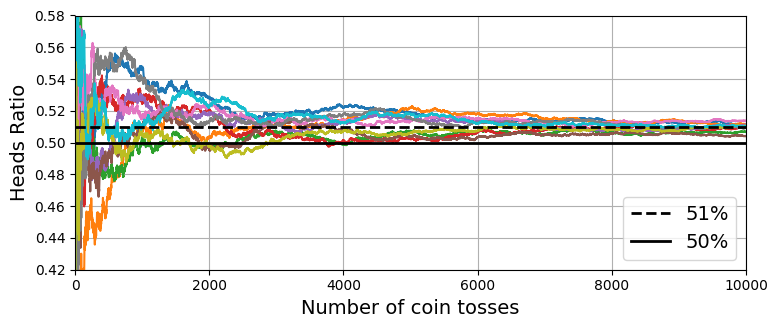

In [ ]:
plt.figure(figsize=(8,3.5))
plt.plot(cumulative_heads_ratio)
plt.plot([0,10000],[0.51,0.51],"k--",linewidth=2,label="51%")
plt.plot([0,10000],[0.5,0.5],"k-",linewidth=2,label="50%")
plt.xlabel("Number of coin tosses")
plt.ylabel("Heads Ratio")
plt.legend(loc="lower right")
plt.axis([0,10000,0.42,0.58])
plt.grid()
save_fig("law_of_large_numbers_plot")
plt.show()

#let's build a voting Classifier on moons dataset

In [ ]:
from sklearn.datasets import make_moons
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier,VotingClassifier
from sklearn.linear_model import LogisticRegression

In [ ]:
X,y=make_moons(n_samples=500,noise=0.30,random_state=42)
X_train,X_test,y_train,y_test=train_test_split(X,y,random_state=42)

In [ ]:
len(X_train)

375

In [ ]:
len(X_test)

125

In [ ]:
voting_clf=VotingClassifier(
    estimators=[
        ('lr',LogisticRegression(random_state=42)),
        ('rf',RandomForestClassifier(random_state=42)),
        ('svc',SVC(random_state=42))
    ]
)

voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(random_state=42))])

In [ ]:
voting_clf.estimators

[('lr', LogisticRegression(random_state=42)),
 ('rf', RandomForestClassifier(random_state=42)),
 ('svc', SVC(random_state=42))]

In [ ]:
voting_clf.estimators_

[LogisticRegression(random_state=42),
 RandomForestClassifier(random_state=42),
 SVC(random_state=42)]

In [ ]:
voting_clf.named_estimators_.items()

dict_items([('lr', LogisticRegression(random_state=42)), ('rf', RandomForestClassifier(random_state=42)), ('svc', SVC(random_state=42))])

In [ ]:
for name,clf in voting_clf.named_estimators_.items():
  print(name,"=",clf.score(X_test,y_test))

lr = 0.864
rf = 0.896
svc = 0.896


In [ ]:
voting_clf.predict([[1.2442,1.854455]])

array([0])

In [ ]:
voting_clf.predict(X_test[:1])

array([1])

In [ ]:
[clf.predict(X_test[:1]) for clf in voting_clf.estimators_]    # it predicted as 1 because majority votes for 1 are 2

[array([1]), array([1]), array([0])]

##now look at the performance of the voiting clasifier

In [ ]:
voting_clf.score(X_test,y_test)

0.912

In [ ]:
from sklearn.metrics import accuracy_score

y_pred=voting_clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.912

##Soft Voting (Estimates the class probabilities)

In [ ]:
voting_clf.voting="soft"
voting_clf.named_estimators["svc"].probability=True
voting_clf.fit(X_train,y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(random_state=42)),
                             ('rf', RandomForestClassifier(random_state=42)),
                             ('svc', SVC(probability=True, random_state=42))],
                 voting='soft')

In [ ]:
voting_clf.score(X_test,y_test)

0.92

#Baging and Pasting

In [ ]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1,random_state=42)
bag_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), max_samples=100,
                  n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
bag_clf.score(X_test,y_test)

0.904

In [ ]:
past_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,max_samples=100,n_jobs=-1,random_state=42,bootstrap=False)
past_clf.fit(X_train,y_train)

BaggingClassifier(bootstrap=False, estimator=DecisionTreeClassifier(),
                  max_samples=100, n_estimators=500, n_jobs=-1,
                  random_state=42)

In [ ]:
past_clf.score(X_test,y_test)

0.92

##Single Decision Tree with Bagging Ensemble

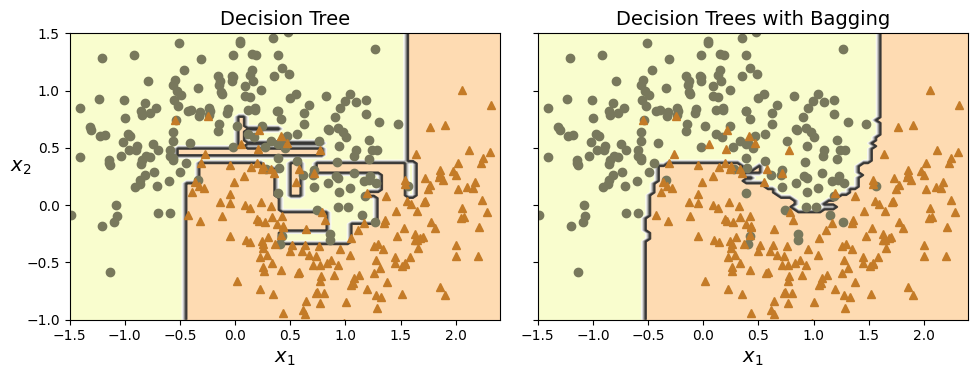

In [ ]:
def plot_decision_boundary(clf, X, y, alpha=1.0):
    axes=[-1.5, 2.4, -1, 1.5]
    x1, x2 = np.meshgrid(np.linspace(axes[0], axes[1], 100),
                         np.linspace(axes[2], axes[3], 100))
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)

    plt.contourf(x1, x2, y_pred, alpha=0.3 * alpha, cmap='Wistia')
    plt.contour(x1, x2, y_pred, cmap="Greys", alpha=0.8 * alpha)
    colors = ["#78785c", "#c47b27"]
    markers = ("o", "^")
    for idx in (0, 1):
        plt.plot(X[:, 0][y == idx], X[:, 1][y == idx],
                 color=colors[idx], marker=markers[idx], linestyle="none")
    plt.axis(axes)
    plt.xlabel(r"$x_1$")
    plt.ylabel(r"$x_2$", rotation=0)

tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)

fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)
plt.sca(axes[0])
plot_decision_boundary(tree_clf, X_train, y_train)
plt.title("Decision Tree")
plt.sca(axes[1])
plot_decision_boundary(bag_clf, X_train, y_train)
plt.title("Decision Trees with Bagging")
plt.ylabel("")
save_fig("decision_tree_without_and_with_bagging_plot")
plt.show()

#Out of Bag Evaluation

In [ ]:
bag_oob_clf=BaggingClassifier(DecisionTreeClassifier(),n_estimators=500,oob_score=True,n_jobs=-1,random_state=42)

bag_oob_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(), n_estimators=500,
                  n_jobs=-1, oob_score=True, random_state=42)

In [ ]:
bag_oob_clf.oob_score_

0.896

## Let's find out the accuracy of bagging clf

In [ ]:
y_pred=bag_oob_clf.predict(X_test)
accuracy_score(y_pred,y_test)

0.92

##Decision Function of oob

In [ ]:
bag_oob_clf.oob_decision_function_[:3]

array([[0.32352941, 0.67647059],
       [0.3375    , 0.6625    ],
       [1.        , 0.        ]])

#Random Forests

In [ ]:
rand_clf=RandomForestClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,random_state=42)

rand_clf.fit(X_train,y_train)

RandomForestClassifier(max_leaf_nodes=16, n_estimators=500, n_jobs=-1,
                       random_state=42)

In [ ]:
y_pred_rf=rand_clf.predict(X_test)

In [ ]:
accuracy_score(y_pred_rf,y_test)

0.912

In [ ]:
# the below BaggingClassifier is equalent to the RandomForestClassifier

bag_rf_clf=BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",max_leaf_nodes=16),n_estimators=500,n_jobs=-1,random_state=42)
bag_rf_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_features='sqrt',
                                                   max_leaf_nodes=16),
                  n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
y_bag_pred=bag_rf_clf.predict(X_test)

In [ ]:
accuracy_score(y_bag_pred,y_test)

0.912

In [ ]:
np.all(y_bag_pred==y_pred_rf)  # verifies that all predictions are identical

True

#Extremely Randomized Trees

In [ ]:
ex_rand_clf=BaggingClassifier(DecisionTreeClassifier(max_features="sqrt",max_leaf_nodes=16,splitter="random"),n_estimators=500,n_jobs=-1,random_state=42)
ex_rand_clf.fit(X_train,y_train)

BaggingClassifier(estimator=DecisionTreeClassifier(max_features='sqrt',
                                                   max_leaf_nodes=16,
                                                   splitter='random'),
                  n_estimators=500, n_jobs=-1, random_state=42)

In [ ]:
y_ex_pred=ex_rand_clf.predict(X_test)
accuracy_score(y_ex_pred,y_test)

0.912

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier

extra_clf=ExtraTreesClassifier(n_estimators=500,max_leaf_nodes=16,n_jobs=-1,bootstrap=True,random_state=42)
extra_clf.fit(X_train,y_train)

ExtraTreesClassifier(bootstrap=True, max_leaf_nodes=16, n_estimators=500,
                     n_jobs=-1, random_state=42)

In [ ]:
extra_pred=extra_clf.predict(X_test)

In [ ]:
from sklearn.model_selection import cross_val_score

extra_rmse=-cross_val_score(extra_clf,X_train,y_train,scoring="neg_root_mean_squared_error",cv=10)

In [ ]:
extra_rmse.mean()

0.3206208466538732

In [ ]:
rand_rmse=-cross_val_score(rand_clf,X_train,y_train,scoring="neg_root_mean_squared_error",cv=10)

In [ ]:
rand_rmse.mean()

0.2826812647735637

In [ ]:
from sklearn.metrics import mean_squared_error

extra_mse=mean_squared_error(y_test,extra_pred,squared=False)

In [ ]:
extra_mse

0.2966479394838265

In [ ]:
rand_mse=mean_squared_error(y_test,y_pred_rf,squared=False)

In [ ]:
rand_mse

0.2966479394838265

In [ ]:
rand_clf.feature_importances_

array([0.42253629, 0.57746371])

#Feature Importances

In [ ]:
from sklearn.datasets import load_iris

iris=load_iris(as_frame=True)
rnd_clf=RandomForestClassifier(n_estimators=500,random_state=42)
rand_clf.fit(iris.data,iris.target)

for score,name in zip(rand_clf.feature_importances_,iris.data.columns):
  print(score.round(2),name)

0.11 sepal length (cm)
0.02 sepal width (cm)
0.44 petal length (cm)
0.42 petal width (cm)


/usr/local/lib/python3.10/dist-packages/sklearn/datasets/_openml.py:968: FutureWarning: The default value of `parser` will change from `'liac-arff'` to `'auto'` in 1.4. You can set `parser='auto'` to silence this warning. Therefore, an `ImportError` will be raised from 1.4 if the dataset is dense and pandas is not installed. Note that the pandas parser may return different data types. See the Notes Section in fetch_openml's API doc for details.
  warn(


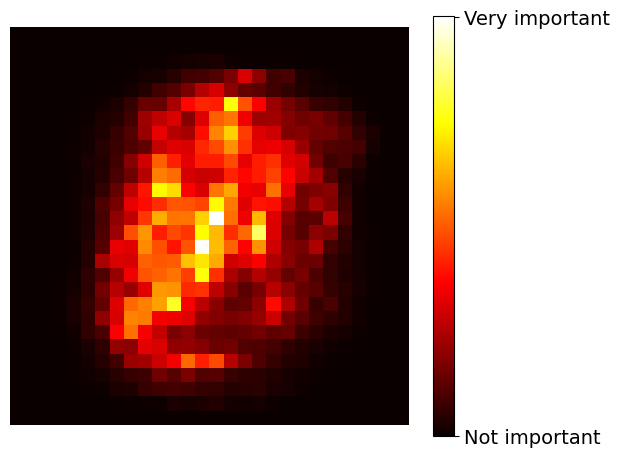

In [ ]:
from sklearn.datasets import fetch_openml

X_mnist, y_mnist = fetch_openml('mnist_784', return_X_y=True, as_frame=False)

rnd_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rnd_clf.fit(X_mnist, y_mnist)
heatmap_image = rnd_clf.feature_importances_.reshape(28, 28)
plt.imshow(heatmap_image, cmap="hot")
cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(),
                           rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'], fontsize=14)
plt.axis("off")
save_fig("mnist_feature_importance_plot")
plt.show()

#Boosting

#AdaBoost

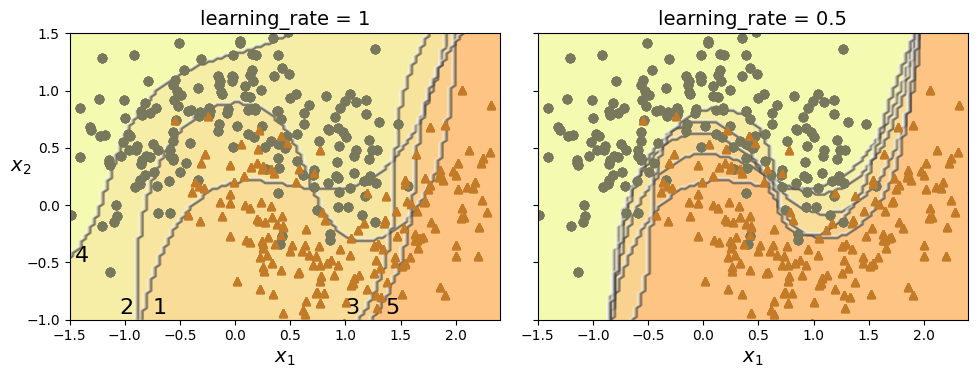

In [ ]:
m=len(X_train)

fig,axes=plt.subplots(ncols=2,figsize=(10,4),sharey=True)
for subplot,learning_rate in ((0,1),(1,0.5)):
  sample_weights=np.ones(m)/m
  plt.sca(axes[subplot])
  for i in range(5):
    svm_clf=SVC(C=0.2,gamma=0.6,random_state=48)
    svm_clf.fit(X_train,y_train,sample_weight=sample_weights * m)
    y_pred=svm_clf.predict(X_train)

    error_weights = sample_weights[y_pred != y_train].sum()
    r = error_weights / sample_weights.sum()  # equation 7-1
    alpha = learning_rate * np.log((1 - r) / r)  # equation 7-2
    sample_weights[y_pred != y_train] *= np.exp(alpha)  # equation 7-3
    sample_weights /= sample_weights.sum()  # normalization step

    plot_decision_boundary(svm_clf, X_train, y_train, alpha=0.4)
    plt.title(f"learning_rate = {learning_rate}")

  if subplot == 0:
      plt.text(-0.75, -0.95, "1", fontsize=16)
      plt.text(-1.05, -0.95, "2", fontsize=16)
      plt.text(1.0, -0.95, "3", fontsize=16)
      plt.text(-1.45, -0.5, "4", fontsize=16)
      plt.text(1.36,  -0.95, "5", fontsize=16)
  else:
      plt.ylabel("")

save_fig("boosting_plot")
plt.show()

In [ ]:
from sklearn.ensemble import AdaBoostClassifier

ada_clf=AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1),n_estimators=30,
    learning_rate=0.5,random_state=42
)

ada_clf.fit(X_train,y_train)

AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=1),
                   learning_rate=0.5, n_estimators=30, random_state=42)

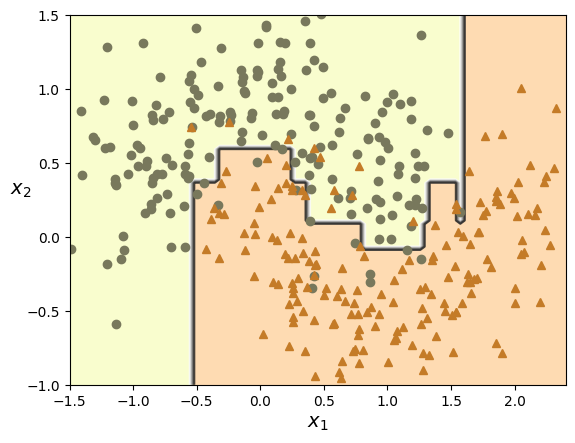

In [ ]:
plot_decision_boundary(ada_clf,X_train,y_train)

#Gradient Boosting (XGBoost)

Let's create a simple quadratic dataset and fit a DecisionTreeRegressor to it:

In [ ]:
from sklearn.tree import DecisionTreeRegressor

np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3 * X[:, 0] ** 2 + 0.05 * np.random.randn(100)  # y = 3x² + Gaussian noise

In [ ]:
len(X)

100

In [ ]:
len(y)

100

In [ ]:
tree_reg1=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg1.fit(X,y)

DecisionTreeRegressor(max_depth=2, random_state=42)

Now we'll train the second DecisionTreeRegressor on the residual errors made by the first tree

In [ ]:
y2=y - tree_reg1.predict(X)

In [ ]:
len(y2)

100

In [ ]:
tree_reg2=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg2.fit(X,y2)

DecisionTreeRegressor(max_depth=2, random_state=42)

Now we'll train the third DecisionTreeRegressor on the residual errors made by the second tree

In [ ]:
y3=y2 - tree_reg2.predict(X)

In [ ]:
tree_reg3=DecisionTreeRegressor(max_depth=2,random_state=42)
tree_reg3.fit(X,y3)

DecisionTreeRegressor(max_depth=2, random_state=42)

Now add the predictions of all the trees to make prediction

In [ ]:
X_new=np.array([[-0.4],[0.],[0.5]])
sum(tree.predict(X_new) for tree in (tree_reg1,tree_reg2,tree_reg3))

array([0.49484029, 0.04021166, 0.75026781])

In [ ]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt=GradientBoostingRegressor(max_depth=2,n_estimators=3,learning_rate=1,random_state=42)
gbrt.fit(X,y)

GradientBoostingRegressor(learning_rate=1, max_depth=2, n_estimators=3,
                          random_state=42)

In [ ]:
gbrt.predict(X_new)  # same as above

array([0.49484029, 0.04021166, 0.75026781])

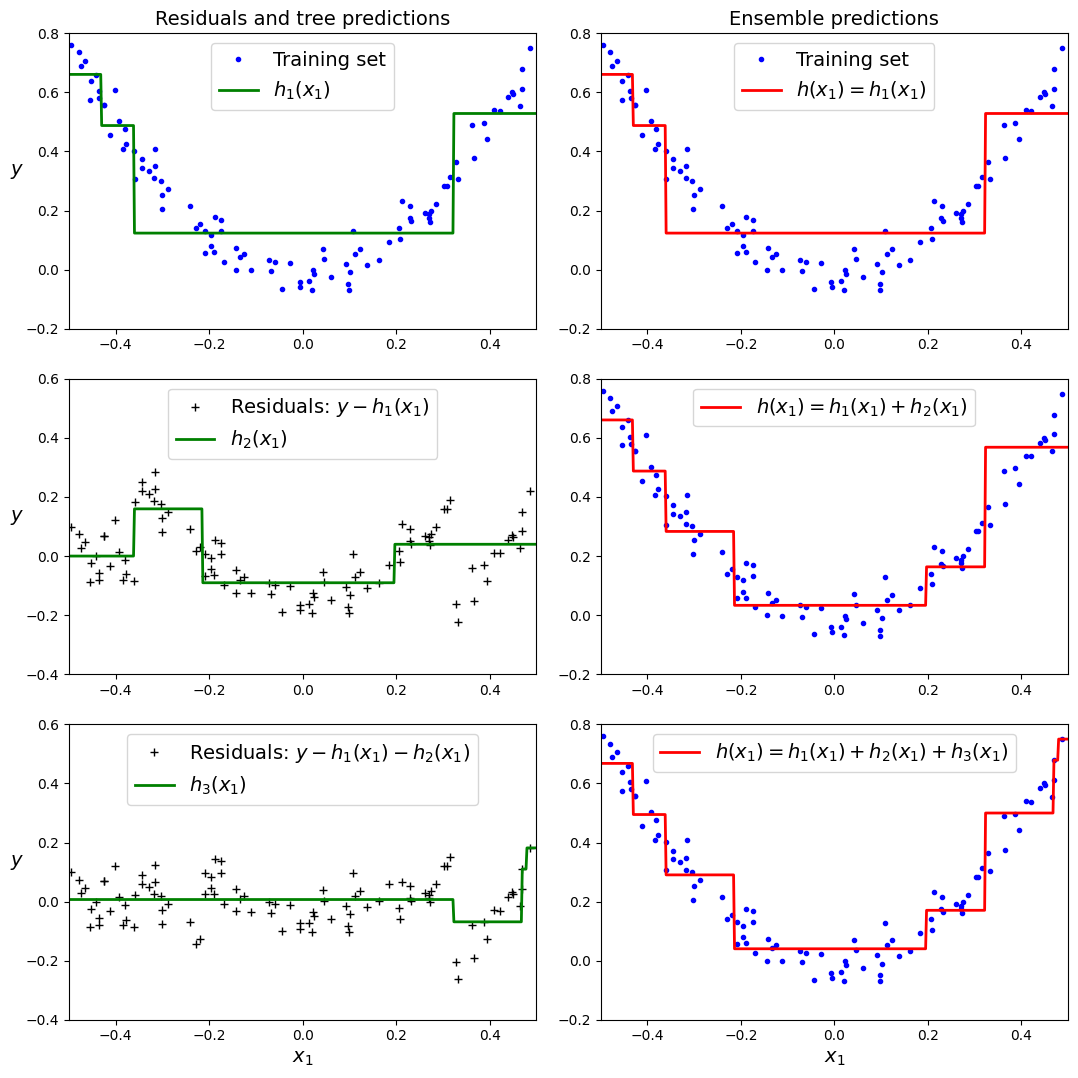

In [ ]:
def plot_predictions(regressors, X, y, axes, style,
                     label=None, data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1))
                 for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center")
    plt.axis(axes)

plt.figure(figsize=(11, 11))

plt.subplot(3, 2, 1)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="g-",
                 label="$h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$  ", rotation=0)
plt.title("Residuals and tree predictions")

plt.subplot(3, 2, 2)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.title("Ensemble predictions")

plt.subplot(3, 2, 3)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_2(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1)$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 4)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.2, 0.8],
                  style="r-", label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.subplot(3, 2, 5)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.4, 0.6], style="g-",
                 label="$h_3(x_1)$", data_style="k+",
                 data_label="Residuals: $y - h_1(x_1) - h_2(x_1)$")
plt.xlabel("$x_1$")
plt.ylabel("$y$  ", rotation=0)

plt.subplot(3, 2, 6)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y,
                 axes=[-0.5, 0.5, -0.2, 0.8], style="r-",
                 label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$")

save_fig("gradient_boosting_plot")
plt.show()

In [ ]:
gbrt_best = GradientBoostingRegressor(
    max_depth=2, learning_rate=0.05, n_estimators=500,
    n_iter_no_change=10, random_state=42)
gbrt_best.fit(X, y)

GradientBoostingRegressor(learning_rate=0.05, max_depth=2, n_estimators=500,
                          n_iter_no_change=10, random_state=42)

In [ ]:
gbrt_best.n_estimators_

92

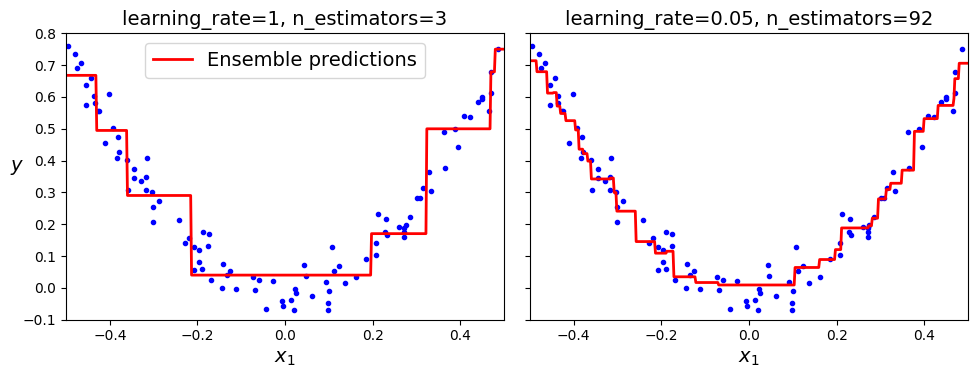

In [ ]:
fig, axes = plt.subplots(ncols=2, figsize=(10, 4), sharey=True)

plt.sca(axes[0])
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-",
                 label="Ensemble predictions")
plt.title(f"learning_rate={gbrt.learning_rate}, "
          f"n_estimators={gbrt.n_estimators_}")
plt.xlabel("$x_1$")
plt.ylabel("$y$", rotation=0)

plt.sca(axes[1])
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8], style="r-")
plt.title(f"learning_rate={gbrt_best.learning_rate}, "
          f"n_estimators={gbrt_best.n_estimators_}")
plt.xlabel("$x_1$")

save_fig("gbrt_learning_rate_plot")
plt.show()

#Histogram-Based Gradient Boosting

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
import tarfile
import urllib.request

def load_housing_data():
    tarball_path = Path("datasets/housing.tgz")
    if not tarball_path.is_file():
        Path("datasets").mkdir(parents=True, exist_ok=True)
        url = "https://github.com/ageron/data/raw/main/housing.tgz"
        urllib.request.urlretrieve(url, tarball_path)
        with tarfile.open(tarball_path) as housing_tarball:
            housing_tarball.extractall(path="datasets")
    return pd.read_csv(Path("datasets/housing/housing.csv"))

housing = load_housing_data()

train_set, test_set = train_test_split(housing, test_size=0.2, random_state=42)
housing_labels = train_set["median_house_value"]
housing = train_set.drop("median_house_value", axis=1)

In [ ]:
from sklearn.pipeline import make_pipeline
from sklearn.compose import make_column_transformer
from sklearn.ensemble import HistGradientBoostingRegressor
from sklearn.preprocessing import OrdinalEncoder

hgb_reg=make_pipeline(
    make_column_transformer((OrdinalEncoder(),["ocean_proximity"])),
    HistGradientBoostingRegressor(categorical_features=[0],random_state=42)
)

hgb_reg.fit(housing,housing_labels)

Pipeline(steps=[('columntransformer',
                 ColumnTransformer(transformers=[('ordinalencoder',
                                                  OrdinalEncoder(),
                                                  ['ocean_proximity'])])),
                ('histgradientboostingregressor',
                 HistGradientBoostingRegressor(categorical_features=[0],
                                               random_state=42))])

In [ ]:
from sklearn.model_selection import cross_val_score

hgb_rms=-cross_val_score(hgb_reg,housing,housing_labels,scoring="neg_root_mean_squared_error",cv=10)

In [ ]:
pd.Series(hgb_rms).describe()

count        10.000000
mean     100072.359266
std        1279.306141
min       97150.422689
25%       99417.040517
50%      100564.972734
75%      100887.062827
max      101366.636077
dtype: float64

#stacking

In [ ]:
from sklearn.ensemble import StackingClassifier

stacking_clf = StackingClassifier(
    estimators=[
        ('lr', LogisticRegression(random_state=42)),
        ('rf', RandomForestClassifier(random_state=42)),
        ('svc', SVC(probability=True, random_state=42))
    ],
    final_estimator=RandomForestClassifier(random_state=43),
    cv=5  # number of cross-validation folds
)
stacking_clf.fit(X_train, y_train)

StackingClassifier(cv=5,
                   estimators=[('lr', LogisticRegression(random_state=42)),
                               ('rf', RandomForestClassifier(random_state=42)),
                               ('svc', SVC(probability=True, random_state=42))],
                   final_estimator=RandomForestClassifier(random_state=43))

In [ ]:
stacking_clf.score(X_test,y_test)

0.928